![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](INPUT/shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   INPUT   README.md
attacks.csv	exported.csv  OUTPUT


In [2]:
# Importing modules
import pandas as pd
import numpy as np
import random
import matplotlib

#pd.compat.PY3 = True
%matplotlib inline

In [3]:
# Loading the cleaned dataset as a dataframe
df = pd.read_csv('OUTPUT/exported.csv', encoding='latin-1')
df.head()

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving


In [4]:
# Review the columns of the exported dataset
df.columns

Index([u'Unnamed: 0',    u'CaseNum',       u'Date',       u'Year',
             u'Type',    u'Country',       u'Area',   u'Location',
         u'Activity',        u'Sex',     u'Injury',      u'Fatal',
          u'Species',     u'Source',       u'href',   u'Species2',
        u'Activity2'],
      dtype='object')

# 🎣️  BASIC GRAPHS

### FATALITIES

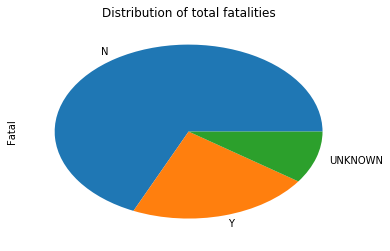

In [5]:
# Total Fatalities include unknown values

s_fatal = df.Fatal.value_counts()
s_fatal.plot.pie(title='Distribution of total fatalities')

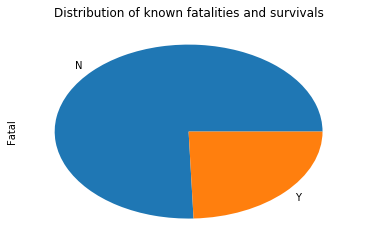

In [6]:
# Taking out the unkown values

fatals_filt = df[~df.Fatal.isin(['UNKNOWN'])]
fatals_filt.Fatal.value_counts().plot.pie(title='Distribution of known fatalities and survivals')

### PROVOKED AND UNPROVOKED ATTACKS

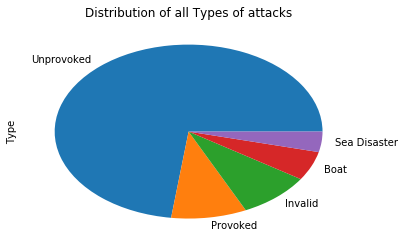

In [7]:
# Types of attack
s_types = df.Type.value_counts()
s_types.plot.pie(title='Distribution of all Types of attacks')

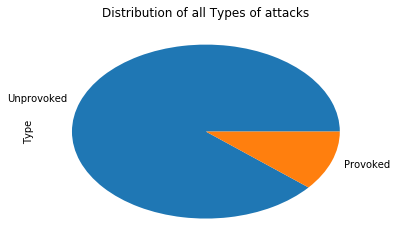

In [8]:
# Types of attack
types_filt = df[df.Type.isin(['Provoked', 'Unprovoked'])]
types_filt.Type.value_counts().plot.pie(title='Distribution of all Types of attacks')

### SPECIES

In [9]:
species_filt = df[
    ~df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])]

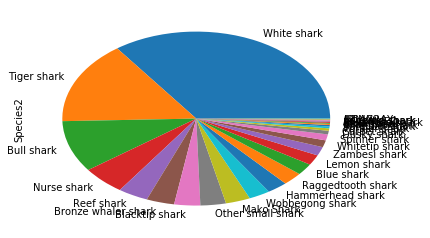

In [10]:
species_filt.Species2.value_counts().plot.pie()

In [11]:
top_sharks = []
for e in list(species_filt.Species2.value_counts().head(5).items()):
    top_sharks.append(e[0])
top_sharks

[u'White shark', u'Tiger shark', u'Bull shark', u'Nurse shark', u'Reef shark']

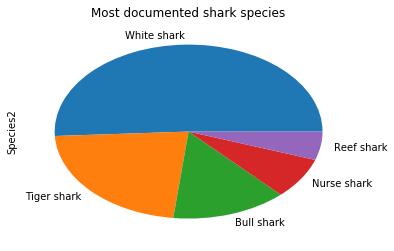

In [12]:
# Top sharks represented and filtered
species_filt.Species2[df.Species2.isin(top_sharks)].value_counts().plot.pie(
    title='Most documented shark species')

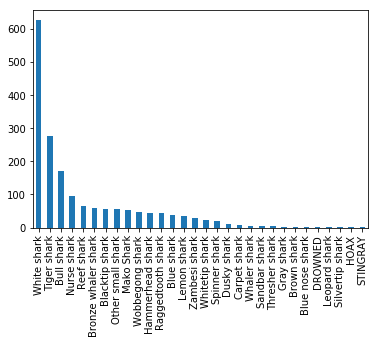

In [13]:
# All species represented
df.Species2[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN'])
           ].value_counts().plot.bar()

# The 5 species with the most registered attacks have a higher *fatalities/survivals ratio* when these attacks are 'PROVOKED' by the victims.

before, I wanted to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [14]:
# 🔥️ Can return an encoding error when representing dataframe
DF = df[~df['Fatal'].isin(['UNKNOWN'])
  ][df['Species2'].isin(top_sharks)
    ][df['Type'].isin(['Provoked', 'Unprovoked'])
     ][['Species2', 'Fatal', 'Type']]
DF.head(10)

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Species2,Fatal,Type
4,Tiger shark,N,Provoked
6,Tiger shark,Y,Unprovoked
8,Bull shark,N,Unprovoked
10,Reef shark,N,Provoked
14,Nurse shark,N,Provoked
18,Tiger shark,N,Unprovoked
22,White shark,N,Unprovoked
23,Tiger shark,N,Unprovoked
24,White shark,N,Unprovoked
26,Bull shark,N,Unprovoked


In [15]:
DF.groupby(['Species2', 'Type']).agg({'Fatal':'count'})

Fatal
Species2    Type             
Bull shark  Provoked        7
            Unprovoked    160
Nurse shark Provoked       56
            Unprovoked     35
Reef shark  Provoked        9
            Unprovoked     55
Tiger shark Provoked       23
            Unprovoked    226
White shark Provoked       26
            Unprovoked    472

In [16]:
# Ref
# dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})

### Creando una columna nueva que convierta la columna `Fatals`.
### `x: True if 'Y' else False`

In [17]:
DF['Victim_died'] = np.where(DF.Fatal.isin(['Y']), True, False)
DF.head()

,Species2,Fatal,Type,Victim_died
4,Tiger shark,N,Provoked,False
6,Tiger shark,Y,Unprovoked,True
8,Bull shark,N,Unprovoked,False
10,Reef shark,N,Provoked,False
14,Nurse shark,N,Provoked,False


In [18]:
DF.groupby(['Species2', 'Type']).agg({'Victim_died':'sum'})

Victim_died
Species2    Type                   
Bull shark  Provoked            0.0
            Unprovoked         35.0
Nurse shark Provoked            0.0
            Unprovoked          0.0
Reef shark  Provoked            0.0
            Unprovoked          0.0
Tiger shark Provoked            0.0
            Unprovoked         62.0
White shark Provoked            0.0
            Unprovoked        137.0

In [19]:
# Fatality of white shark attacks
DF.Fatal[df.Species2.isin(['White shark'])].value_counts()

N    361
Y    137
Name: Fatal, dtype: int64

In [20]:
# White shark attacks, provoked vs not provoked
DF.Type[df.Species2.isin(['White shark'])].value_counts()

Unprovoked    472
Provoked       26
Name: Type, dtype: int64

In [21]:
# Provoked attacks by species
DF.Species2[df.Type.isin(['Provoked'])].value_counts()

Nurse shark    56
White shark    26
Tiger shark    23
Reef shark      9
Bull shark      7
Name: Species2, dtype: int64

In [22]:
# Fatality of nurse shark attacks 
DF.Fatal[df.Species2.isin(['Nurse shark'])].value_counts()

N    91
Name: Fatal, dtype: int64

In [23]:
dfz = df[~df.Fatal.isin(['UNKNOWN'])]
dfz.head()

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving


In [24]:
# Define the sharks I want to consider
killer_sharks =['White shark',
                'Tiger shark',
                'Bull shark',
                'Nurse shark', 
                'Reef shark',
                'Bronze whaler shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark            625
Tiger shark            275
Bull shark             171
Nurse shark             94
Reef shark              65
Bronze whaler shark     60
Name: Species2, dtype: int64


In [25]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [26]:
species_fatality = species_fatality#.reset_index()


#species_fatality[['Fatal', 'Species2']]
#species_fatality[fatals_filetred]#.value_counts()

In [27]:
dfx = species_fatality
fatals_filt

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving
5,5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,"No injury, board bitten",N,Invalid,"Daily Telegraph, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming
7,7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Lemon shark,Fishing
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking
9,9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,M,Minor injury to foot,N,Invalid,"K. McMurray, Tracking Sharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing


In [28]:
#dfx

In [29]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

N          1020
Y           251
UNKNOWN      19
Name: Fatal, dtype: int64
()
White shark            625
Tiger shark            275
Bull shark             171
Nurse shark             94
Reef shark              65
Bronze whaler shark     60
Name: Species2, dtype: int64


# 🦈️At this point, the data is clean enough to create the plot
## Grouping by Species, and then Fatality

In [30]:
dfx['Victim_died'] = np.where(dfx.Fatal.isin(['Y']), True, False)
dfx['Victim_survived'] = np.where(dfx.Fatal.isin(['N']), True, False)

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
toplot =dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})
toplot

Victim_died  Victim_survived
Species2            Fatal                                
Bronze whaler shark N                0.0             55.0
                    UNKNOWN          0.0              0.0
                    Y                4.0              0.0
Bull shark          N                0.0            135.0
                    UNKNOWN          0.0              0.0
                    Y               35.0              0.0
Nurse shark         N                0.0             93.0
                    UNKNOWN          0.0              0.0
Reef shark          N                0.0             64.0
                    UNKNOWN          0.0              0.0
Tiger shark         N                0.0            202.0
                    UNKNOWN          0.0              0.0
                    Y               69.0              0.0
White shark         N                0.0            471.0
                    UNKNOWN          0.0              0.0
                    Y              143.0              0.0

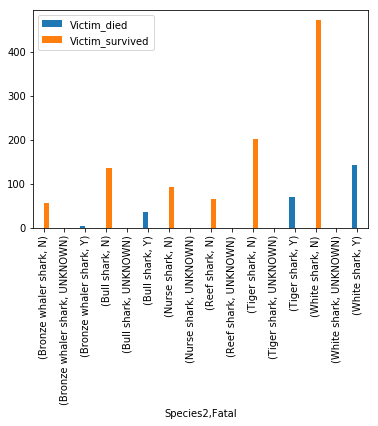

In [32]:
toplot.plot.bar()

In [33]:
toplot

Victim_died  Victim_survived
Species2            Fatal                                
Bronze whaler shark N                0.0             55.0
                    UNKNOWN          0.0              0.0
                    Y                4.0              0.0
Bull shark          N                0.0            135.0
                    UNKNOWN          0.0              0.0
                    Y               35.0              0.0
Nurse shark         N                0.0             93.0
                    UNKNOWN          0.0              0.0
Reef shark          N                0.0             64.0
                    UNKNOWN          0.0              0.0
Tiger shark         N                0.0            202.0
                    UNKNOWN          0.0              0.0
                    Y               69.0              0.0
White shark         N                0.0            471.0
                    UNKNOWN          0.0              0.0
                    Y              143.0              0.0

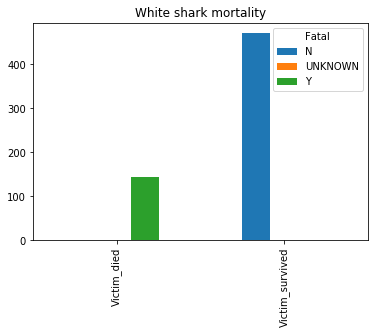

In [34]:
examine = "White shark"
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

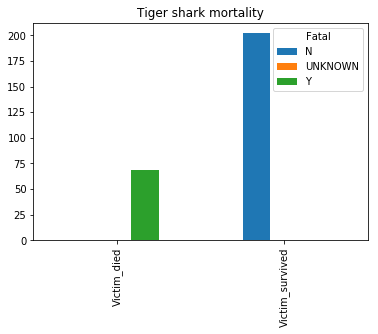

In [35]:
examine = 'Tiger shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

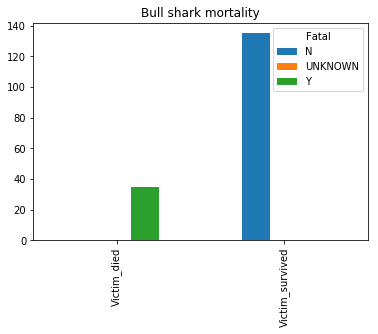

In [36]:
examine = 'Bull shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

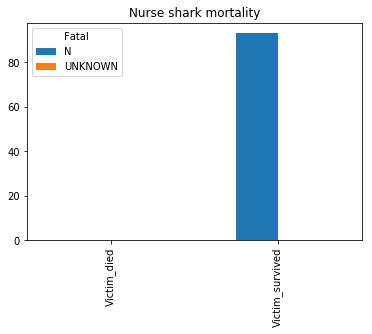

In [37]:
examine = 'Nurse shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [38]:
df.columns

Index([u'Unnamed: 0',    u'CaseNum',       u'Date',       u'Year',
             u'Type',    u'Country',       u'Area',   u'Location',
         u'Activity',        u'Sex',     u'Injury',      u'Fatal',
          u'Species',     u'Source',       u'href',   u'Species2',
        u'Activity2'],
      dtype='object')

In [39]:
dfx[['Species2','Fatal2']].groupby('Species2').agg({'Fatal':"count"})

KeyError: "['Fatal2'] not in index"

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

In [ ]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

In [ ]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [ ]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

In [ ]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

In [ ]:
df2p.Fatal.values

In [ ]:
df2p.Species2.values

In [ ]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

In [ ]:
df.columns

In [ ]:
# This plot is a mess, don't graph it
#df.Location[df.Location.value_counts() > 20].value_counts().plot.pie()

In [ ]:
# IDEA: make bins to filter the years when it happened

In [ ]:
Years2p = list(range(1800,2020,2))
df.Year[df.Year.isin(Years2p)].value_counts().plot.bar()

In [ ]:
df["Decade"] = pd.cut(df.Year,
                            bins=[1800,1850,1900,1950,2000,2050])
                            #, 
#                            labels=range(1800,2020,10))
df.Decade.value_counts().plot.density()